In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/week4"

idlmam.py    Week04_BetterTraining_Exercise.ipynb
__pycache__  Week04_BetterTraining.ipynb


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/week4')
from idlmam import *

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.datasets import make_moons


/content/drive/MyDrive/Colab Notebooks/week4/idlmam.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
X_train, y_train = make_moons(n_samples=8000, noise=0.4)
X_test, y_test = make_moons(n_samples=200, noise=0.4)

train_dataset = TensorDataset(torch.tensor(X_train, \
                                           dtype=torch.float32), \
                              torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32),\
                             torch.tensor(y_test, dtype=torch.long))

training_loader = DataLoader(train_dataset, shuffle=True)
testing_loader = DataLoader(test_dataset)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



In [ ]:
import torch
import torch.nn as nn
model = nn.Sequential(
    nn.Linear(2,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30, 2),
)
model = model.to(device)
loss_func = nn.CrossEntropyLoss()
device = torch.device("cuda")
results_pd = train_simple_network(model, loss_func, training_loader, \
                                  epochs=5, test_loader=testing_loader,\
                                  checkpoint_file='model.pt', \
                                  score_funcs={'Acc':accuracy_score,\
                                               'F1': f1_score})


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Training:   0%|          | 0/8000 [00:00<?, ?it/s]

Testing:   0%|          | 0/200 [00:00<?, ?it/s]

Training:   0%|          | 0/8000 [00:00<?, ?it/s]

Testing:   0%|          | 0/200 [00:00<?, ?it/s]

Training:   0%|          | 0/8000 [00:00<?, ?it/s]

Testing:   0%|          | 0/200 [00:00<?, ?it/s]

Training:   0%|          | 0/8000 [00:00<?, ?it/s]

Testing:   0%|          | 0/200 [00:00<?, ?it/s]

Training:   0%|          | 0/8000 [00:00<?, ?it/s]

Testing:   0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
def visualize2DSoftmax(X, y, model, title=None):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xv, yv = np.meshgrid(np.linspace(x_min, x_max, 20),
                         np.linspace(y_min, y_max, 20), indexing='ij')
    grid_points = np.hstack((xv.reshape(-1, 1), yv.reshape(-1, 1)))

    with torch.no_grad():
        inputs = torch.tensor(grid_points, dtype=torch.float32).to(model[0].weight.device)
        logits = model(inputs)
        probs = F.softmax(logits, dim=1).cpu().numpy()

    plt.figure(figsize=(8, 6))
    plt.contourf(xv, yv, probs[:, 0].reshape(20, 20),
                 levels=np.linspace(0, 1, 20), cmap=plt.cm.RdYlBu)
    ax = plt.gca()
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, ax=ax)

    if title:
        ax.set_title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.show()

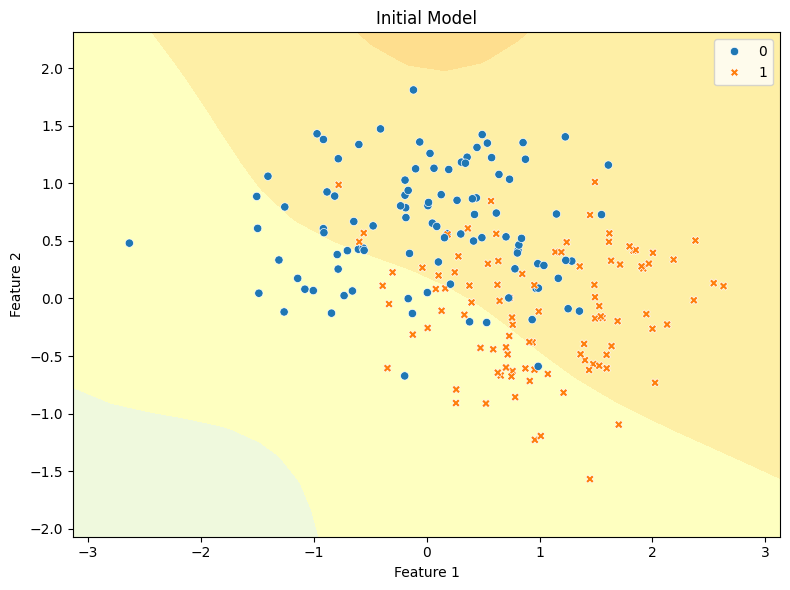

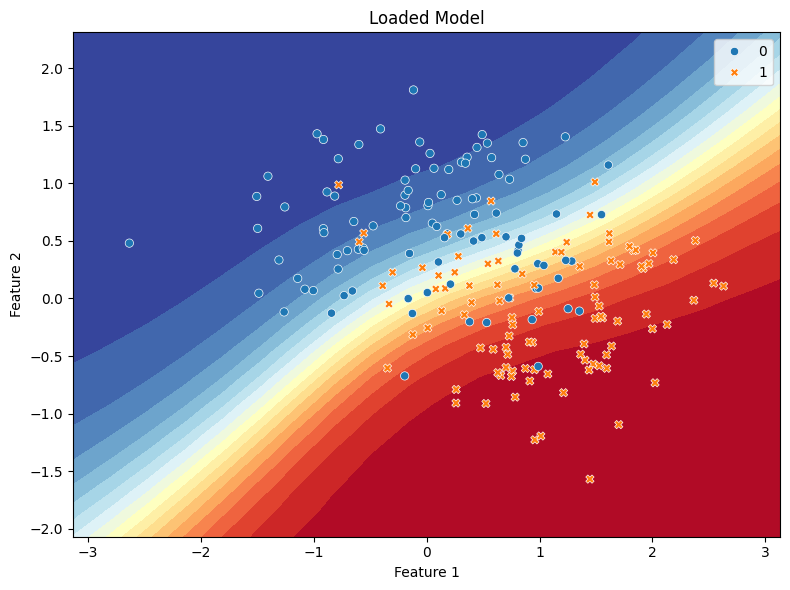

In [ ]:
model_new = nn.Sequential(
    nn.Linear(2,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30, 2),
)
model_new = model_new.to(device)

visualize2DSoftmax(X_test, y_test, model_new, title="Initial Model")

plt.show()

checkpoint_dict = torch.load('model.pt', map_location=device, weights_only=False)


model_new.load_state_dict(checkpoint_dict['model_state_dict'])

visualize2DSoftmax(X_test, y_test, model_new, title="Loaded Model")

plt.show()

<Axes: xlabel='epoch', ylabel='train Acc'>

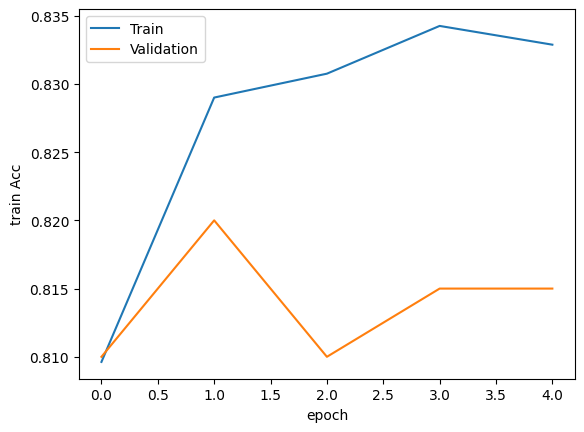

In [ ]:
sns.lineplot(x='epoch', y='train Acc', data=results_pd, label='Train')
sns.lineplot(x='epoch', y='test Acc', data=results_pd, label='Validation')


<Axes: xlabel='total time', ylabel='train F1'>

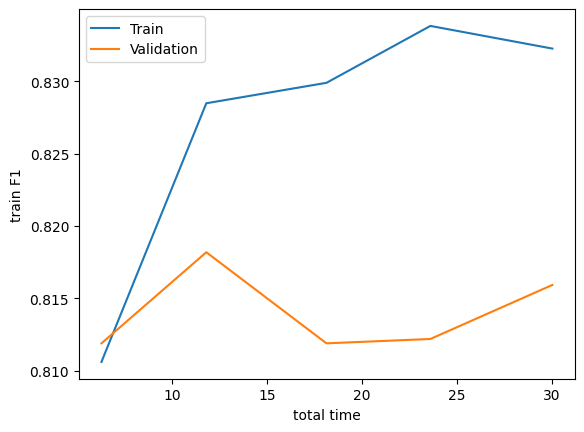

In [ ]:
sns.lineplot(x='total time', y='train F1', data=results_pd, label='Train')
sns.lineplot(x='total time', y='test F1', data=results_pd, label='Validation')


In [ ]:

training_loader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=True)
testing_loader = DataLoader(test_dataset, batch_size=len(test_dataset))

model_gd = nn.Sequential(
    nn.Linear(2,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30, 2),
)
results_true_gd = train_simple_network(model_gd, loss_func, \
                                       training_loader, epochs=5, \
                                       test_loader=testing_loader, \
                                       checkpoint_file='model.pt', \
                                     score_funcs={'Acc':accuracy_score,\
                                                    'F1': f1_score})


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Training:   0%|          | 0/1 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/1 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/1 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/1 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/1 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='total time', ylabel='test Acc'>

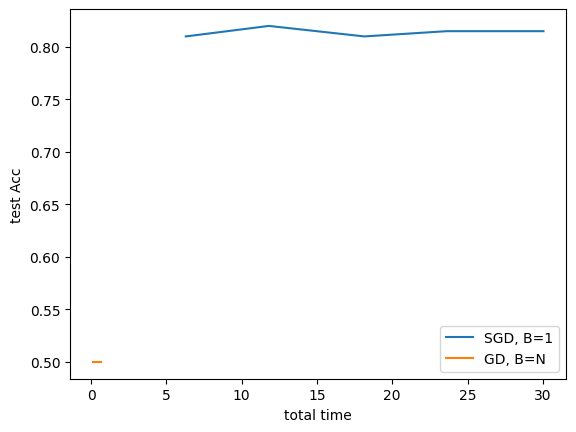

In [ ]:
sns.lineplot(x='total time', y='test Acc', data=results_pd, label='SGD, B=1')
sns.lineplot(x='total time', y='test Acc', data=results_true_gd, label='GD, B=N')


In [ ]:
training_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
model_sgd = nn.Sequential(
    nn.Linear(2,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30, 2),
)
results_batched = train_simple_network(model_sgd, loss_func,\
                                       training_loader, epochs=5, test_loader=testing_loader, \
                                       checkpoint_file='model.pt', \
                                       score_funcs={'Acc':accuracy_score,\
                                                    'F1': f1_score})

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Training:   0%|          | 0/250 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/250 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/250 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/250 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Training:   0%|          | 0/250 [00:00<?, ?it/s]

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='total time', ylabel='test Acc'>

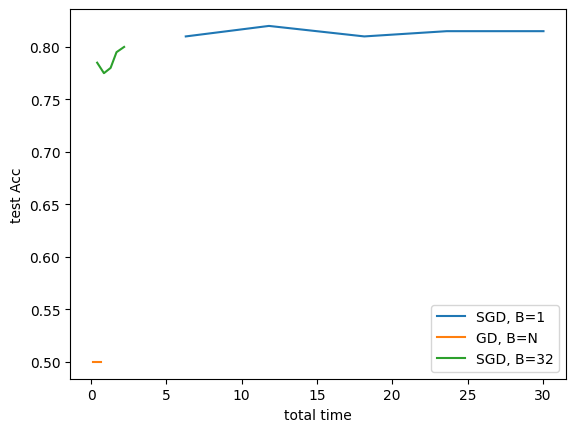

In [ ]:
sns.lineplot(x='total time', y='test Acc', data=results_pd, label='SGD, B=1')
sns.lineplot(x='total time', y='test Acc', data=results_true_gd, label='GD, B=N')
sns.lineplot(x='total time', y='test Acc', data=results_batched, label='SGD, B=32')
